

# Project: Investigate a Dataset (No-show appointments)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

‘ScheduledDay’ tells us on what day the patient set up their appointment.
‘Neighborhood’ indicates the location of the hospital.
‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

dependent variable="no_show" and three independent variables=['Age','Scholarship','SMS_received']

In [32]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline 

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [33]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

#load data 
df = pd.read_csv('appointments.csv')

In [34]:
#checking the unique values
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [35]:
#in the documentation handicap takes only true or false values but here it takes up to 5 
#the documentation also mentioned that sms_received takes might be from 1 to 4 so we can 
#assume that both the headers were switched 

In [36]:
#fixing the header issue 
df = df.rename(columns= {'SMS_received':'Handcap','Handcap': 'SMS_received' })

In [37]:
#checking if the header if fixed 
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
SMS_received           5
Handcap                2
No-show                2
dtype: int64

In [38]:
#checking datatpes and if there missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
SMS_received      110527 non-null int64
Handcap           110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [39]:
#there is no missing data but there is some column's datatypes need to be changed 
#...............................................................................
#checking for duplicate values 
sum(df.duplicated())

0

In [40]:
#no duplicated values 

In [41]:
#renameing values making it lower case replaceing '-' with '_'
df.rename(columns=lambda x:x.strip().lower().replace('-','_'),inplace=True)

In [42]:
df.shape

(110527, 14)

In [43]:
df.head(2)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,sms_received,handcap,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


In [44]:
#getting the number of duplicates 
sum(df['patientid'].duplicated()),sum(df['appointmentid'].duplicated())

(48228, 0)

In [45]:
#changing ids to strings
df['patientid'] = df['patientid'].astype('string')
df['appointmentid'] = df['appointmentid'].astype('string')


In [46]:
#check if they were turned correctly
df['patientid'].dtype,df['appointmentid'].dtype

(dtype('O'), dtype('O'))

In [47]:
#checking the number of duplicates 
sum(df['patientid'].duplicated()),sum(df['appointmentid'].duplicated())

(48228, 0)

In [48]:
df['scheduledday'].dtypes

dtype('O')

In [49]:
#pd.to_datetime(df['I_DATE'])
#changing the date to type date and dropping the time 
df['appointmentday'] = pd.to_datetime(df['appointmentday']).dt.date
df['scheduledday'] = pd.to_datetime(df['scheduledday']).dt.date
df.head()
#i was admitted to this step as I was thinking if diffrance between appointmentday and scheduledday corrleate with attendace or not 
#df['diff_days'] = df['End_date'] - df['Start_date']
#df['diff_days']=df['diff_days']/np.timedelta64(1,'D')
#print(df)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,sms_received,handcap,no_show
0,29872499824296.0,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438.0,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951.0,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174.0,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183.0,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [50]:
#df.applymap(true_false)
#df.loc[:,'no_show':].replace("No",'False')

#we made a function which converts all integer values of x to a boolean 
#and applied to the values which take true or false
def true_false(x):
    if x == 0:
        return False
    elif x == 1:
        return True
    
df.iloc[:,np.r_[7:11,12]] = df.iloc[:,np.r_[7:11,12]].applymap(true_false)
df.loc[:,'no_show'].replace('No','Attend', inplace =True)
df.loc[:,'no_show'].replace('Yes','didnt Attend',inplace = True)

In [51]:
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,sms_received,handcap,no_show
0,29872499824296.0,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,0,False,Attend
1,558997776694438.0,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,0,False,Attend
2,4262962299951.0,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,False,False,False,False,0,False,Attend
3,867951213174.0,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,False,False,False,False,0,False,Attend
4,8841186448183.0,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,True,True,False,0,False,Attend


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
patientid         110527 non-null object
appointmentid     110527 non-null object
gender            110527 non-null object
scheduledday      110527 non-null object
appointmentday    110527 non-null object
age               110527 non-null int64
neighbourhood     110527 non-null object
scholarship       110527 non-null bool
hipertension      110527 non-null bool
diabetes          110527 non-null bool
alcoholism        110527 non-null bool
sms_received      110527 non-null int64
handcap           110527 non-null bool
no_show           110527 non-null object
dtypes: bool(5), int64(2), object(7)
memory usage: 8.1+ MB


In [53]:
df['age'].describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

In [54]:
df.drop(df.index[99832],inplace=True)
#droping wrong values as there isn't age with negtive value 


In [55]:
df_total=df.query('age < 100')
df1 = df_total.copy()
    

In [56]:
df1['age'].describe()

count    110515.000000
mean         37.082242
std          23.100482
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max          99.000000
Name: age, dtype: float64

In [57]:
df1.describe()

,age,sms_received
count,110515.000000,110515.000000
mean,37.082242,0.022196
std,23.100482,0.161391
min,0.000000,0.000000
25%,18.000000,0.000000
50%,37.000000,0.000000
75%,55.000000,0.000000
max,99.000000,4.000000


In [58]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

df_noshow=df.query('no_show == "didnt Attend"')
df2 = df_noshow.copy()

<a id='eda'></a>
## Exploratory Data Analysis





### I'm faceing problem in'this phase' plotint percntage any help please  ? as i not apple to get the count\total using groupby and \\

### Research Question 1 (what is the range of age most likely  gonna miss his appointment )

 ### Reasoning:                                                                                                                                                                          I look if the age effect the chance of showing up or not in the appointment and that by catagoialing the age by his 5-summaries 

In [59]:
df1.describe()

,age,sms_received
count,110515.000000,110515.000000
mean,37.082242,0.022196
std,23.100482,0.161391
min,0.000000,0.000000
25%,18.000000,0.000000
50%,37.000000,0.000000
75%,55.000000,0.000000
max,99.000000,4.000000


In [63]:
#selecting bin values and labels 
bin_edge=[0,18,37,55,99]
bin_names=['younger than 18','between 18 and 37','betw=een 37 and 55','older than 55']
df1['catagoial_age']=pd.cut(df1['age'],bin_edge,labels=bin_names)

In [64]:
df1.groupby('no_show')['catagoial_age'].value_counts()/df.shape[0]

no_show       catagoial_age     
Attend        older than 55         0.209842
              betw=een 37 and 55    0.195891
              between 18 and 37     0.188517
              younger than 18       0.177506
didnt Attend  between 18 and 37     0.058032
              younger than 18       0.051644
              betw=een 37 and 55    0.047545
              older than 55         0.038905
Name: catagoial_age, dtype: float64

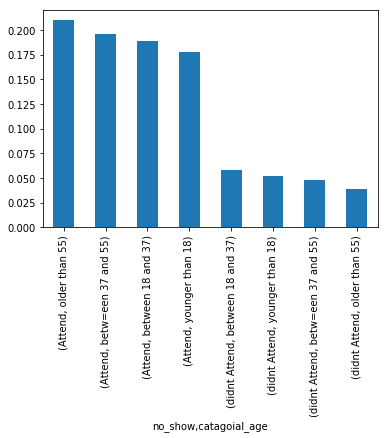

In [66]:
percintage_age=df1.groupby('no_show')['catagoial_age'].value_counts()/df1.shape[0]
percintage_age.plot(kind ='bar');

### Research Question 1 (what is the range of age most likely  gonna miss his appoinment )  'with excluding the people who attend thier appoiment'

 ### Reasoning:                                                                                                                                                                          I look if the age effect the chance of  not to show in the appointment and that by catagoialing the age by his 5-summaries 

In [ ]:
df2.describe()

In [ ]:
#selecting bin values and labels 
bin_edge=[0,16,33,51,98]
bin_names=['younger than 16','between 16 and 33','between 33 and 51','older than 51']
df2['catagoial_age']=pd.cut(df2['age'],bin_edge,labels=bin_names)

In [ ]:

# title and labels
plt.ylabel('number of appointments')
plt.xlabel('categorial_age')
plt.title('no_show vs categories age')
no_show_vs_Cat = df2.groupby('no_show')['catagoial_age'].value_counts()
no_show_vs_Cat.plot(kind = 'bar',title = 'Age vs categories')



In [ ]:

plt.ylabel('number of appointments')
plt.xlabel('categorial_age')
plt.title('no_show vs categories age')
df2.groupby('no_show')['catagoial_age'].value_counts().plot();
#df2.groupby('no_show')['catagoial_age'].value_counts()[ind].plot();

### Research Question 2  (Does people who suffer from handcap aren't able to attend thier appoinment? )

 ### Reasoning:                                                                                                                                                                          I am looking if the handicap effect the chance of showing up or not in the appointment and that by ploting  percintage of attendance for handicap patient

In [ ]:
df1.groupby('no_show')['handcap'].value_counts()/df1.shape[0]

In [ ]:

plt.ylabel('number of appointments')
plt.xlabel('Handcap')
plt.title('no_show vs Handcap')
counts=df1.groupby('no_show')['handcap'].value_counts()/df1.shape[0]
counts.plot(kind ='bar');


### Research Question 2  (Does people who suffer from handcap aren't able to attend thier appoinment ?)            'with excluding the people who attend thier appoiment'

 ### Reasoning:                                                                                                                                                                          I am looking if the handicap effect the chance of not show in the appointment and that by ploting  percintage of attendance for handicap patient

In [ ]:

plt.ylabel('number of appointments')
plt.xlabel('Handcap')
plt.title('No_show vs Handcap')
df2.groupby('no_show')['handcap'].value_counts().plot(kind ='bar');

### Research Question 3 (Does paient who have Scholarship mostly likely to attend there appoiment?)    ''No_show vs Scholarship''

 ### Reasoning:                                                                                                                                                                          I am looking if the scholarship effect the chance of showing up or not in the appointment and that by ploting  percintage of attendance for scholarship holders patient

In [ ]:
 df1.groupby('no_show')['scholarship'].value_counts()/df1.shape[0]

In [ ]:
plt.xlabel('scholar_ships')
plt.ylabel('number of appointments')

plt.title('No_show vs scholarships')
df20 = df1.groupby('no_show')['scholarship'].value_counts()/df1.shape[0]
df20.plot(kind ='bar');

In [ ]:
df1.groupby('no_show')['scholarship'].value_counts()

### Research Question 3 (Does paient who dosen't have Scholarship mostly likely to skip thier appoiment?)                    'with excluding the people who attend thier appoiment'

 ### Reasoning:                                                                                                                                                                          I am looking if the scholarship effect the chance of  not show in the appointment and that by ploting  percintage of attendance for scholarship holders patient

In [ ]:
plt.xlabel('scholar_ships')
plt.ylabel('number of appointments')

plt.title('Now vs scholarships proportions')
df3 = df2.groupby('no_show')['scholarship'].value_counts()/df2.shape[0]
df3.plot(kind ='bar')

In [ ]:
df2.groupby('no_show')['scholarship'].value_counts()/df2.shape[0]

In [ ]:
#number of handicap patients without any duplicates
#total_number_handcap = sum(df['handcap'])
#df_ishandcap = df.query('handcap == True')
#df_ishandcap['patientid'].nunique()
#Total_handcap=27118
#total_num of patient=62299
#df2.shape[0] 
#total_num of patient_whom missed there appoiments= 22319
#df2.groupby('no_show')['handcap'].value_counts()/df2.shape[0]
#total_num of patient_whom missed there appoiments and handcap = 9785
#total_num of patient_whom missed there appoiments and not handcap=12535
#df2.groupby('no_show')['scholarship'].value_counts()/df2.shape[0]
#total_num of patient_whom missed there appoiments and have scholrship = .115507%
#total_num of patient_whom missed there appoiments and not have scholrship=.884493%

# what percentage of appointments get missed ??

 ### Reasoning:                                                                                                                                                                          I am looking for chance of showing up or not in the appointment and that by ploting  percintage of attendance 

In [ ]:
plt.title('total percentage of attended vs didnt attend')
df4 =df['no_show'].value_counts()/df.shape[0];
df4.plot(kind='pie')

In [ ]:
df['no_show'].value_counts()/df.shape[0]

## ------------------------------------------------------------------------------------------------


In [ ]:
df.groupby('neighbourhood').nunique()

<a id='conclusions'></a>
## Conclusions

#### Q1 conclusion:

unexpectclly the paitend whom most likely not to show in there appoinment are between 16 and 33 and that might but to further elaborate:
the ages less than 16 : least amount of people that miss their appointments ,this can be justified because they still have adult supervision

ages above 51 : the second most amount of people that miss their appointments, this can be justified because older people have more problems and do tend to appear for random check ups 

ages from 16 to 31: this category tends to miss the most amount of appoinments to justify they have more busy life so higher in missing the appoiments.

##### Q2 conclutsion:

 yes,nearly 44% from people whom miss there appoinment are handcap and that show problem that they may have trouble going to the appointments because of many factors like transportation,distance,services .
 

##### Q3 conclusion:

nearly 88.4% from people whom miss there appoinments dont't have scholarships and 90.6% from people who do attend their appointment doesn't Have scholarships this means that people who do not have scholarships and the times a patient attend\miss are not neccisarely correlated 

#### limitations:

the limitations for the data set can be described as follows: 
1- most of the values calculated had were descrete since all of them were booleans which does not give much of a room for scatter plots or correlation analyzation.further more,the values had to be converted to booleans since they were integers in the first place.                                                                                                                                                                                                                                                   
2- I could not isolate the patients with multiple appointments and that might affect the analysis.                                

3- the was some inbalanced data in the age column to further elaborate, some ages were above 100 and below zero ;this could extremly affect the mean age of the data.                                                                                        

4- erroneous in the data set between the handicap column and the sms_recieved column ,As mentioned in the documentation handicap values were either true or false and sms_recieved recieved at most 5 values and apparently both of these columns were msplaced.                                                                                                                                                                                                                                                               
5- data might be biased in the sao paolo state which appears in the neighboorhoods data and this bias also affects the scholar ships 
